In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

df= pd.read_csv('/content/sample_data/car-data-1.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(df.Fuel_Type .value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace= True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#split data
x = df.drop(['Car_Name','Selling_Price'],axis = 1)
y = df['Selling_Price']
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [21]:
#model creation 
#Linearregrsession

lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

#predictiom and sqaure error
x_training_prediction =lin_model.predict(x_train)

error_score = metrics.r2_score(y_train,x_training_prediction)
print(error_score)

0.8799451660493711


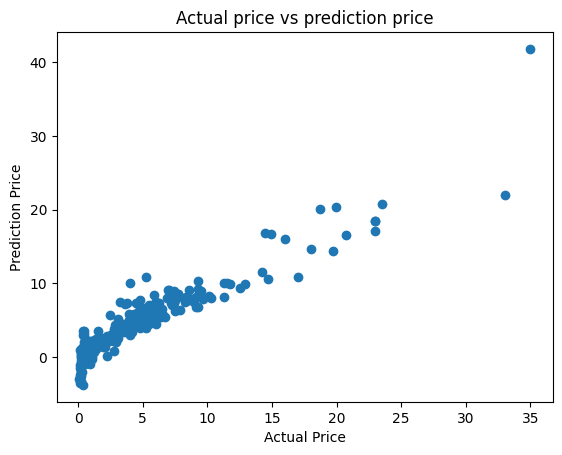

In [23]:
#visulize the plot
plt.scatter(y_train,x_training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title('Actual price vs prediction price')
plt.show()

0.8427856123435794


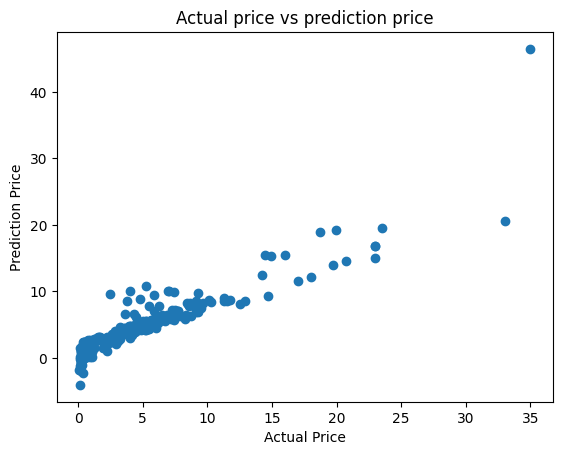

In [28]:
#lassao model createtion
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

#predictiom and sqaure error
x_training_prediction =lasso_model.predict(x_train)

error_score = metrics.r2_score(y_train,x_training_prediction)
print(error_score)



plt.scatter(y_train,x_training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title('Actual price vs prediction price')
plt.show()

0.8365766715027051


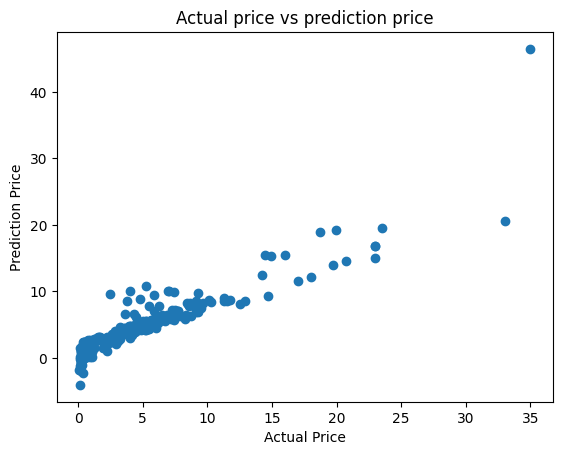

In [31]:
#linearregression test

#predictiom and sqaure error
x_test_prediction =lin_model.predict(x_test)

error_score = metrics.r2_score(y_test,x_test_prediction)
print(error_score)

plt.scatter(y_train,x_training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title('Actual price vs prediction price')
plt.show()

0.8709167941173195


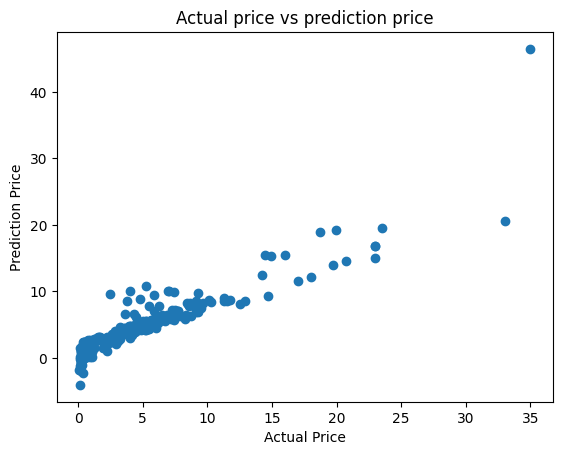

In [32]:
#lasso test

#predictiom and sqaure error
x_test_prediction =lasso_model.predict(x_test)

error_score = metrics.r2_score(y_test,x_test_prediction)
print(error_score)

plt.scatter(y_train,x_training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title('Actual price vs prediction price')
plt.show()

 
